In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# librerie
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
#download dataset (training and testing)
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels)= cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print("Dimensione train_images :",train_images.shape)
print("Dimensione train_labels :",train_labels.shape)
print("")
print("Dimensione test_images :",test_images.shape)
print("Dimensione test_labels :",test_labels.shape)

Dimensione train_images : (50000, 32, 32, 3)
Dimensione train_labels : (50000, 1)

Dimensione test_images : (10000, 32, 32, 3)
Dimensione test_labels : (10000, 1)


In [4]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
#le labels di train e test sono array 2D, per la classificazione basta ed avanza un array 1D, quindi lo converto.
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

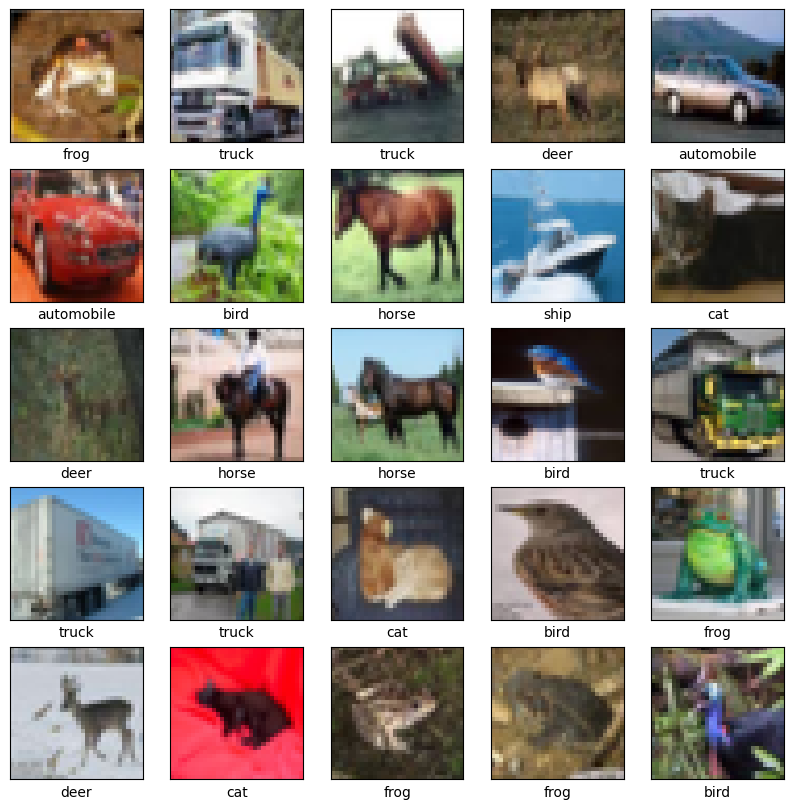

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
#Normalizzazione delle immagini. Un'immagine ha 3 canali (R,G,B) e ciascuno di essi può avere un valore che va da 0 a 255. Quindi normalizzo tale valore in un range tra 0 e 1.
train_images = tf.keras.utils.normalize(train_images, axis = 1)
test_images = tf.keras.utils.normalize(test_images,axis = 1)

In [9]:
#Creazione del modello
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))) #individua features tramite i filtri
model.add(tf.keras.layers.MaxPooling2D((2, 2)))  #permette di ridurre le dimensioni delle matrici

model.add(tf.keras. layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten()) #permette di passare dalla rete convolutiva alla rete densamente connessa, passando da matrici ad un livello con solo neuroni
model.add(tf.keras.layers.Dense(64, activation="relu")) #livello hidden
model.add(tf.keras.layers.Dense(10, activation="softmax")) #livello di output


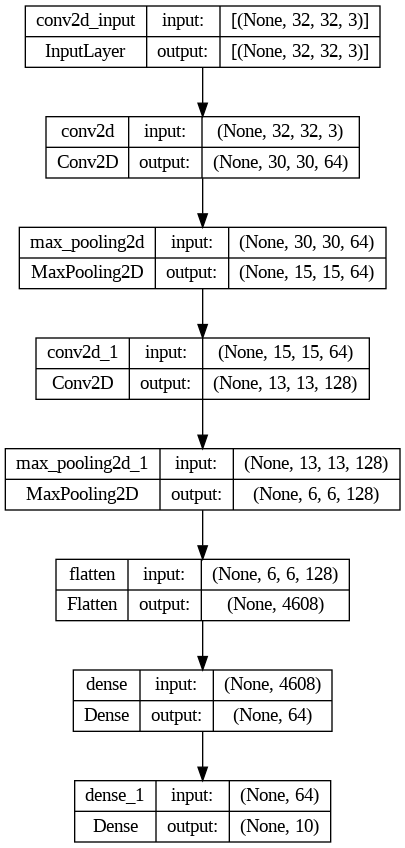

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [12]:
#configuro il processo di apprendimento
model.compile(optimizer= "adam",
              loss="sparse_categorical_crossentropy",
              metrics= ["accuracy"])

In [13]:
#allenamento modello
history= model.fit(train_images, train_labels, epochs=15,validation_data=(test_images,test_labels))

Epoch 1/15
1563/1563 [==============================] - 22s 7ms/step - loss: 1.6523 - accuracy: 0.4070 - val_loss: 1.3491 - val_accuracy: 0.5209
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2500 - accuracy: 0.5634 - val_loss: 1.1896 - val_accuracy: 0.5854
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1075 - accuracy: 0.6158 - val_loss: 1.0904 - val_accuracy: 0.6219
Epoch 4/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0157 - accuracy: 0.6474 - val_loss: 1.0370 - val_accuracy: 0.6428
Epoch 5/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9470 - accuracy: 0.6718 - val_loss: 1.0437 - val_accuracy: 0.6402
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8923 - accuracy: 0.6921 - val_loss: 0.9930 - val_accuracy: 0.6617
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8451 - accuracy: 0.7065 - val_loss: 1.0509 - val_ac

In [14]:
#valutazione del modello
test_loss, test_acc =model.evaluate(test_images, test_labels, verbose=1)

print("accuracy in testing: ", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.0168 - accuracy: 0.6804
accuracy in testing:  0.680400013923645


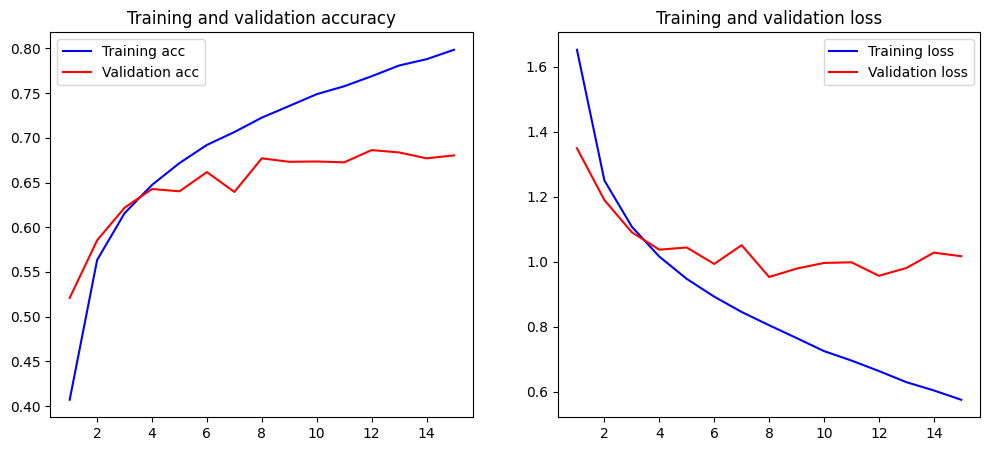

In [15]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_history(history)

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict([test_images])
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(test_labels, y_pred_classes))


313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.79      0.80      0.80      1000
           2       0.52      0.58      0.55      1000
           3       0.50      0.48      0.49      1000
           4       0.60      0.66      0.63      1000
           5       0.57      0.61      0.59      1000
           6       0.80      0.71      0.75      1000
           7       0.73      0.75      0.74      1000
           8       0.87      0.71      0.78      1000
           9       0.77      0.77      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [17]:

#eseguo le predizioni del modello sul testset
predictions = model.predict([test_images])

313/313 [==============================] - 1s 2ms/step


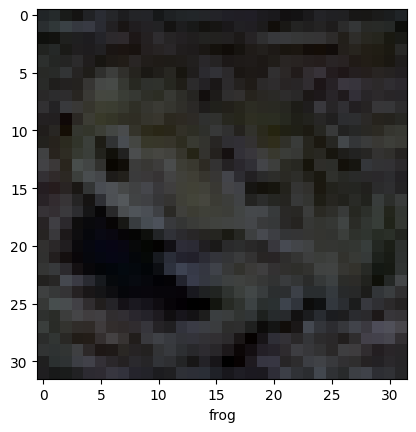

In [18]:
#verifico se la predizione ha avuto successo
immagine=311
plt.imshow(test_images[immagine], cmap = plt.cm.binary)
plt.xlabel(class_names[test_labels[immagine]])
plt.show()

In [19]:
class_names[np.argmax(predictions[immagine])]

'frog'

In [25]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [20]:
!pip install mlxtend

In [21]:
pip install mlxtend --upgrade --no-deps

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import mlxtend
print(mlxtend.__version__)

0.18.0


In [22]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels,10)
test_labels_cat= to_categorical(test_labels,10)

In [23]:
y_pred = model.predict([test_images])
predizione_final2 = np.argmax(y_pred, axis=1)
import numpy as np
rounded_labels=np.argmax(test_labels_cat, axis=1)
print(rounded_labels[1])
mat = confusion_matrix(rounded_labels, predizione_final2)
plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), show_normed=True)

313/313 [==============================] - 1s 2ms/step
8


NameError: ignored